# Loading the dataset

In [1]:
from os import getcwd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
path = getcwd().replace('Concepts', 'Dataset') + '/insurance.csv'

In [5]:
Obs = np.loadtxt(path, delimiter = ',', skiprows=1, usecols=[1,2])

In [6]:
Obs.shape

(63, 2)

In [7]:
np.info(Obs)

class:  ndarray
shape:  (63, 2)
strides:  (16, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x13509e890
byteorder:  little
byteswap:  False
type: float64


# Preprocessing

In [8]:
X, Y = Obs[:,0], Obs[:, 1]

In [9]:
N = Y.size

In [10]:
X.shape, Y.shape

((63,), (63,))

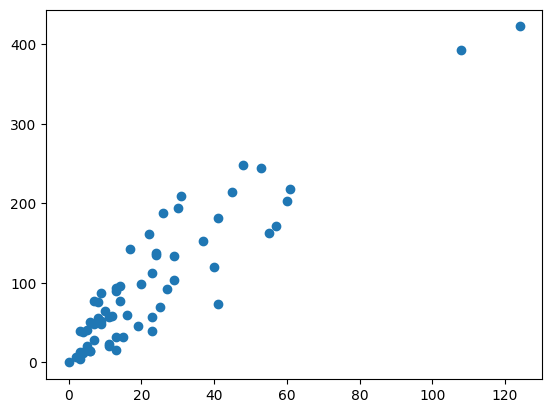

In [11]:
plt.scatter(X, Y)

In [12]:
def scale(x: np.ndarray):
    return (x - np.mean(x)) / np.std(x)

In [13]:
X = scale(X)

In [14]:
Y = scale(Y)

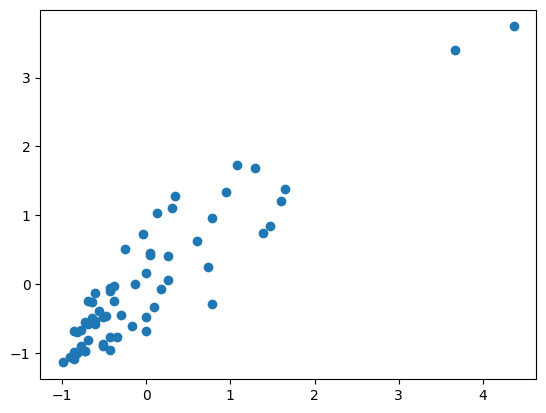

In [15]:
plt.scatter(X, Y)

# Loss function

In [16]:
def loss_func(m, c):
    loss = 0
    for xi, yi in zip(X, Y):
        loss += (m * xi + c - yi) ** 2
    return loss / N

In [17]:
loss_func(0, 0)

1.0

# Step function

In [18]:
m = 0.0
c = 0.0

In [19]:
def step_m(m, c):
    step = 0
    for xi, yi in zip(X, Y):
        step += 2 * (m * xi + c - yi) * xi
    return step / N

In [20]:
def step_c(m, c):
    step = 0
    for xi, yi in zip(X, Y):
        step += 2 * (m * xi + c - yi) * 1
    return step / N

In [21]:
for i in range(1000):
    m1 = 0.01 * step_m(m, c)
    c1 = 0.01 * step_c(m, c)
    
    if abs(m1) < 1e-6 and abs(c1) < 1e-6:
        print(f"Stopped at {i}th iteration")
        break
    
    m = m - m1
    c = c - c1
else:
    print("Max iteration count")

Stopped at 486th iteration


In [22]:
m, c

(0.9128285431192115, -4.059803639651121e-17)

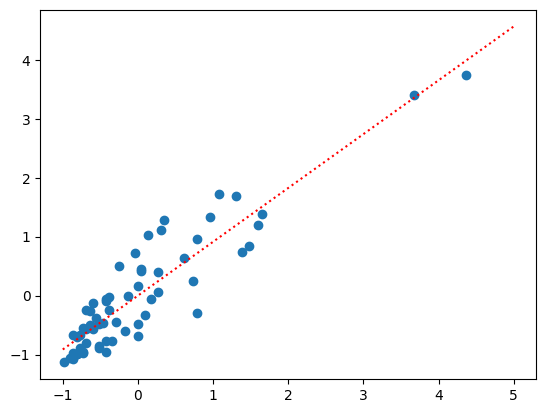

In [23]:
plt.scatter(X, Y)
plt.plot(range(-1,6), [m * x + c for x in range(-1,6)], 'r:')

In [24]:
loss_func(m, c)

0.16665333048983524